In [ ]:
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
r = requests.get('https://www.renthop.com/nyc/apartments-for-rent')

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
r.content

b'<!doctype html>\n<html lang="en">\n<head>\n<meta http-equiv="Content-Type" content="text/html; charset=utf-8" />\n<meta http-equiv="Content-Language" content="en" />\n<title>New York Apartment Finder, NYC Apartments Search</title>\n<meta name="description" content="Newly listed NYC apartments for rent. Smooth work commute, popular bars and nightlife, nearby restaurants and grocery stores, and safety. Find your perfect home in New York, NY." />\n<meta name="author" content="RentHop" />\n<meta name="Copyright" content="Copyright (c) 2009 - 2020 RentHop.com" />\n<meta property="fb:page_id" content="124300320712" />\n<meta property="fb:app_id" content="294321126236" />\n<meta name="og:image" content="https://www.renthop.com/images/renthop_icon_small.png" />\n<link rel="image_src" href="https://www.renthop.com/images/renthop_icon_small.png" />\n<meta name="og:title" content="New York Apartment Finder, NYC Apartments Search" />\n<meta name="og:description" content="Newly listed NYC apartme

In [ ]:
from bs4 import BeautifulSoup

In [ ]:
!pip install html5lib

     |████████████████████████████████| 122kB 4.6MB/s eta 0:00:01
  Using cached https://files.pythonhosted.org/packages/f4/24/2a3e3df732393fed8b3ebf2ec078f05546de641fe1b667ee316ec1dcf3b7/webencodings-0.5.1-py2.py3-none-any.whl
You should consider upgrading via the 'pip install --upgrade pip' command.


In [ ]:
soup = BeautifulSoup(r.content, "html5lib")

In [ ]:
listing_divs = soup.select('div[class*=search-info]')
listing_divs

In [ ]:
len(listing_divs)

20

In [ ]:
listing_divs[0]

In [ ]:
listing_divs[0].select('a[id*=title]')

[<a class="font-size-11 listing-title-link b" href="https://www.renthop.com/listings/525-east-81st-st/1f/15844966" id="listing-15844966-title">525 East 81st St, Apt 1F</a>]

In [ ]:
listing_divs[0].select('a[id*=title]')[0]

<a class="font-size-11 listing-title-link b" href="https://www.renthop.com/listings/525-east-81st-st/1f/15844966" id="listing-15844966-title">525 East 81st St, Apt 1F</a>

In [ ]:
listing_divs[0].select('a[id*=title]')[0]['href']

'https://www.renthop.com/listings/525-east-81st-st/1f/15844966'

In [ ]:
href = listing_divs[0].select('a[id*=title]')[0]['href']
addy = listing_divs[0].select('a[id*=title]')[0].string
hood = listing_divs[0].select('div[id*=hood]')[0].string.replace('\n','')

In [ ]:
print(href)
print(addy)
print(hood)

https://www.renthop.com/listings/525-east-81st-st/1f/15844966
525 East 81st St, Apt 1F
Yorkville, Upper East Side, Upper Manhattan, Manhattan


In [ ]:
listing_specs = listing_divs[0].select('table[id*=info] tr')
listing_specs

[<tr>
 <td class="font-size-11 b" id="listing-15844966-price" style="padding: 0px 10px 0px 0px; vertical-align: bottom;">
 $2,900
 </td>
 <td class="font-size-11 b" style="border-left: 1px solid #eeeeee; padding: 0px 10px 0px 10px; vertical-align: bottom;">
 <span style="color: #444444;">
 1 Bed
 </span>
 </td>
 <td class="font-size-11 b" style="border-left: 1px solid #eeeeee; padding: 0px 10px 0px 10px; vertical-align: bottom;">
 <span style="color: #444444;">1 Bath</span>
 </td>
 </tr>]

In [ ]:
for spec in listing_specs:
    spec_data = spec.text.strip().replace(' ', '_').split()
    print(spec_data)

['$2,900', '1_Bed', '1_Bath']


In [ ]:
listing_list = []
for idx in range(len(listing_divs)):
    indv_listing = []
    current_listing = listing_divs[idx]
    href = current_listing.select('a[id*=title]')[0]['href']
    addy = current_listing.select('a[id*=title]')[0].string #address
    hood = current_listing.select('div[id*=hood]')[0]\  #neiborhood
    .string.replace('\n','')
    
    indv_listing.append(href)
    indv_listing.append(addy)
    indv_listing.append(hood)
    
    listing_specs = current_listing.select('table[id*=info] tr')
    for spec in listing_specs:
        try:
            indv_listing.extend(spec.text.strip()\
                                .replace(' ', '_').split())
        except:
            indv_listing.extend(np.nan)
    listing_list.append(indv_listing)

In [ ]:
listing_list

[['https://www.renthop.com/listings/525-east-81st-st/1f/15844966',
  '525 East 81st St, Apt 1F',
  'Yorkville, Upper East Side, Upper Manhattan, Manhattan',
  '$2,900',
  '1_Bed',
  '1_Bath'],
 ['https://www.renthop.com/listings/300-east-89th-st/3c/15927703',
  '300 East 89th St, Apt 3C',
  'Yorkville, Upper East Side, Upper Manhattan, Manhattan',
  '$2,395',
  '1_Bed',
  '1_Bath'],
 ['https://www.renthop.com/listings/columbus-circle-hells-kitchen-gorgeous-2-bed/2918/18607641',
  "Columbus Circle - Hell's Kitch...",
  "Hell's Kitchen, Midtown Manhattan, Manhattan",
  '$4,993',
  '2_Bed',
  '/_Flex_3_',
  '2_Bath'],
 ['https://www.renthop.com/listings/62-lewis-ave/2/14551601',
  '62 Lewis Ave, Apt 2',
  'Bedford-Stuyvesant, Northern Brooklyn, Brooklyn',
  '$1,975',
  '1_Bed',
  '1_Bath'],
 ['https://www.renthop.com/listings/70-ashburton-ave/4/15783971',
  '70 Ashburton Ave, Apt 4',
  'Getty Square, Yonkers',
  '$1,550',
  'Studio',
  '1_Bath'],
 ['https://www.renthop.com/listings/600-li

In [ ]:
len(listing_list)

20

In [ ]:
# iterable url

url_prefix = "https://www.renthop.com/search/nyc?max_price=50000&min_price=0&page="
page_no = 1
url_suffix = "&sort=hopscore&q=&search=0"

In [ ]:
# test url

for i in range(3):
    target_page = url_prefix + str(page_no) + url_suffix
    print(target_page)
    page_no += 1

https://www.renthop.com/search/nyc?max_price=50000&min_price=0&page=1&sort=hopscore&q=&search=0
https://www.renthop.com/search/nyc?max_price=50000&min_price=0&page=2&sort=hopscore&q=&search=0
https://www.renthop.com/search/nyc?max_price=50000&min_price=0&page=3&sort=hopscore&q=&search=0


In [ ]:
def parse_data(listing_divs):
    listing_list = []
    for idx in range(len(listing_divs)):
        indv_listing = []
        current_listing = listing_divs[idx]
        href = current_listing.select('a[id*=title]')[0]['href']
        addy = current_listing.select('a[id*=title]')[0].string
        hood = current_listing.select('div[id*=hood]')[0]\
        .string.replace('\n','')

        indv_listing.append(href)
        indv_listing.append(addy)
        indv_listing.append(hood)

        listing_specs = current_listing.select('table[id*=info] tr')
        for spec in listing_specs:
            try:
                values = spec.text.strip().replace(' ', '_').split()
                clean_values = [x for x in values if x != '_']
                indv_listing.extend(clean_values)
            except:
                indv_listing.extend(np.nan)
        listing_list.append(indv_listing)
    return listing_list

In [ ]:
all_pages_parsed = []
for i in range(100):
    target_page = url_prefix + str(page_no) + url_suffix
    print(target_page)
    r = requests.get(target_page)
    
    soup = BeautifulSoup(r.content, 'html5lib')
    
    listing_divs = soup.select('div[class*=search-info]') # contain 20 houses
    
    one_page_parsed = parse_data(listing_divs)
    
    all_pages_parsed.extend(one_page_parsed) #contain 100*20 = 2000 houses
    
    page_no += 1

https://www.renthop.com/search/nyc?max_price=50000&min_price=0&page=4&sort=hopscore&q=&search=0
https://www.renthop.com/search/nyc?max_price=50000&min_price=0&page=5&sort=hopscore&q=&search=0
https://www.renthop.com/search/nyc?max_price=50000&min_price=0&page=6&sort=hopscore&q=&search=0
https://www.renthop.com/search/nyc?max_price=50000&min_price=0&page=7&sort=hopscore&q=&search=0
https://www.renthop.com/search/nyc?max_price=50000&min_price=0&page=8&sort=hopscore&q=&search=0
https://www.renthop.com/search/nyc?max_price=50000&min_price=0&page=9&sort=hopscore&q=&search=0
https://www.renthop.com/search/nyc?max_price=50000&min_price=0&page=10&sort=hopscore&q=&search=0
https://www.renthop.com/search/nyc?max_price=50000&min_price=0&page=11&sort=hopscore&q=&search=0
https://www.renthop.com/search/nyc?max_price=50000&min_price=0&page=12&sort=hopscore&q=&search=0
https://www.renthop.com/search/nyc?max_price=50000&min_price=0&page=13&sort=hopscore&q=&search=0
https://www.renthop.com/search/nyc?m

https://www.renthop.com/search/nyc?max_price=50000&min_price=0&page=89&sort=hopscore&q=&search=0
https://www.renthop.com/search/nyc?max_price=50000&min_price=0&page=90&sort=hopscore&q=&search=0
https://www.renthop.com/search/nyc?max_price=50000&min_price=0&page=91&sort=hopscore&q=&search=0
https://www.renthop.com/search/nyc?max_price=50000&min_price=0&page=92&sort=hopscore&q=&search=0
https://www.renthop.com/search/nyc?max_price=50000&min_price=0&page=93&sort=hopscore&q=&search=0
https://www.renthop.com/search/nyc?max_price=50000&min_price=0&page=94&sort=hopscore&q=&search=0
https://www.renthop.com/search/nyc?max_price=50000&min_price=0&page=95&sort=hopscore&q=&search=0
https://www.renthop.com/search/nyc?max_price=50000&min_price=0&page=96&sort=hopscore&q=&search=0
https://www.renthop.com/search/nyc?max_price=50000&min_price=0&page=97&sort=hopscore&q=&search=0
https://www.renthop.com/search/nyc?max_price=50000&min_price=0&page=98&sort=hopscore&q=&search=0
https://www.renthop.com/search

In [ ]:
len(all_pages_parsed)

2000

In [ ]:
all_pages_parsed

[['https://www.renthop.com/listings/345-east-83rd-st/29/15942672',
  '345 East 83rd St, Apt 29',
  'Yorkville, Upper East Side, Upper Manhattan, Manhattan',
  '$2,150',
  '1_Bed',
  '1_Bath'],
 ['https://www.renthop.com/listings/63-wall-street/810/15829787',
  '63 Wall Street, Apt 810',
  'Financial District, Downtown Manhattan, Manhattan',
  '$3,662',
  '1_Bed',
  '/_Flex_2_',
  '1_Bath'],
 ['https://www.renthop.com/listings/blue-slip/-2rag-/14708619',
  'Blue Slip',
  'Greenpoint, Northern Brooklyn, Brooklyn',
  '$4,121',
  '1_Bed',
  '1_Bath'],
 ['https://www.renthop.com/listings/blue-slip/-2rs-/14733609',
  'Blue Slip',
  'Greenpoint, Northern Brooklyn, Brooklyn',
  '$3,245',
  'Studio',
  '1_Bath'],
 ['https://www.renthop.com/listings/424-east-9th-street/10/57639346',
  '424 East 9th Street, Apt 10',
  'East Village, Downtown Manhattan, Manhattan',
  '$4,150',
  '2_Bed',
  '1_Bath'],
 ['https://www.renthop.com/listings/hanover-square/3k/15392104',
  ' Hanover Square',
  'Financial

In [ ]:
type(all_pages_parsed)

list

In [ ]:
df = pd.DataFrame(all_pages_parsed, columns=['url', 'address', 'neighborhood', 'rent', 'beds', 'baths','unknow'])

In [ ]:
df

,url,address,neighborhood,rent,beds,baths,unknow
0,https://www.renthop.com/listings/345-east-83rd...,"345 East 83rd St, Apt 29","Yorkville, Upper East Side, Upper Manhattan, M...","$2,150",1_Bed,1_Bath,None
1,https://www.renthop.com/listings/63-wall-stree...,"63 Wall Street, Apt 810","Financial District, Downtown Manhattan, Manhattan","$3,662",1_Bed,/_Flex_2_,1_Bath
2,https://www.renthop.com/listings/blue-slip/-2r...,Blue Slip,"Greenpoint, Northern Brooklyn, Brooklyn","$4,121",1_Bed,1_Bath,None
3,https://www.renthop.com/listings/blue-slip/-2r...,Blue Slip,"Greenpoint, Northern Brooklyn, Brooklyn","$3,245",Studio,1_Bath,None
4,https://www.renthop.com/listings/424-east-9th-...,"424 East 9th Street, Apt 10","East Village, Downtown Manhattan, Manhattan","$4,150",2_Bed,1_Bath,None
5,https://www.renthop.com/listings/hanover-squar...,Hanover Square,"Financial District, Downtown Manhattan, Manhattan","$3,060",Studio,1_Bath,None
6,https://www.renthop.com/listings/west-109th-st...,West 109th Street,"Manhattan Valley, Upper West Side, Upper Manha...","$4,000",3_Bed,1_Bath,None
7,https://www.renthop.com/listings/53-pitt-stree...,"53 Pitt Street, Apt 2B","Lower East Side, Downtown Manhattan, Manhattan","$4,600",3_Bed,2_Bath,None
8,https://www.renthop.com/listings/150-west-225t...,"150 West 225th Street, Apt 19J...","Marble Hill, West Bronx, Manhattan","$1,925",1_Bed,1_Bath,None
9,https://www.renthop.com/listings/2-gold-st/502...,"2 Gold St, Apt 5021","Financial District, Downtown Manhattan, Manhattan","$6,896",3_Bed,/_Flex_4_,2_Bath


In [ ]:
#df.to_csv('NYhouse_scrapping.csv')

# Begin from here

In [ ]:
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df=pd.read_csv('/content/drive/My Drive/Data/Chapter02_NYhouse_scrapping (1).csv')

In [ ]:
df['beds'].unique()

array(['1_Bed', 'Studio', '2_Bed', '3_Bed', '4_Bed', '5_Bed', 'Loft',
       '_Studio', '_1_Bed', '_2_Bed', 'Room', '_5_Bed', '6_Bed', '_3_Bed'],
      dtype=object)

In [ ]:
df['baths'].value_counts()

1_Bath        1341
2_Bath         349
/_Flex_2_      103
/_Flex_3_       71
3_Bath          41
/_Flex_4_       29
/_Flex_1_       22
1.5_Bath        16
4_Bath           8
_1_Bath          7
2.5_Bath         5
3.5_Bath         3
5_Bath           2
_/_Flex_2_       1
/_Flex_5_        1
_2_Bath          1
Name: baths, dtype: int64

In [ ]:
df['unknow'].value_counts()
#HOW TO copy value from unknow to baths colums at exactly position ?

1_Bath      149
2_Bath       70
3_Bath        6
4_Bath        1
1.5_Bath      1
Name: unknow, dtype: int64

In [ ]:
mask=df['baths'].str.contains('Flex',regex=True)
df['baths'][mask]=df['unknow']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df['baths'].value_counts()

1_Bath      1490
2_Bath       419
3_Bath        47
1.5_Bath      17
4_Bath         9
_1_Bath        7
2.5_Bath       5
3.5_Bath       3
5_Bath         2
_2_Bath        1
Name: baths, dtype: int64

In [ ]:
df['beds'] = df['beds'].map(lambda x: x[1:] if x.startswith('_') else x)
#get string from positio 1 (ignore underscore from beginning)
df['baths'] = df['baths'].map(lambda x: x[1:] if x.startswith('_') else x)

In [ ]:
df['beds'].value_counts()

1_Bed     671
2_Bed     590
Studio    355
3_Bed     272
4_Bed      90
5_Bed      11
Room        9
Loft        1
6_Bed       1
Name: beds, dtype: int64

In [ ]:
df['baths'].value_counts()

1_Bath      1497
2_Bath       420
3_Bath        47
1.5_Bath      17
4_Bath         9
2.5_Bath       5
3.5_Bath       3
5_Bath         2
Name: baths, dtype: int64

In [ ]:
df['rent'] = df['rent'].map(lambda x: str(x).replace('$','').replace(',','')).astype('int')
df['beds'] = df['beds'].map(lambda x: x.replace('_Bed', ''))
df['beds'] = df['beds'].map(lambda x: x.replace('Studio', '0'))
df['beds'] = df['beds'].map(lambda x: x.replace('Room', '0'))
df['beds'] = df['beds'].map(lambda x: x.replace('Loft', '0')).astype('int')


In [ ]:
df['beds'].value_counts()

1    671
2    590
0    365
3    272
4     90
5     11
6      1
Name: beds, dtype: int64

In [ ]:
df['baths'] = df['baths'].map(lambda x: x.replace('_Bath', '')).astype('float')
df['baths'].value_counts()

1.0    1497
2.0     420
3.0      47
1.5      17
4.0       9
2.5       5
3.5       3
5.0       2
Name: baths, dtype: int64

In [ ]:
df=df.drop('unknow',axis=1)

In [ ]:
df.head()

,Unnamed: 0,url,address,neighborhood,rent,beds,baths
0,0,https://www.renthop.com/listings/345-east-83rd...,"345 East 83rd St, Apt 29","Yorkville, Upper East Side, Upper Manhattan, M...",2150,1,1.0
1,1,https://www.renthop.com/listings/63-wall-stree...,"63 Wall Street, Apt 810","Financial District, Downtown Manhattan, Manhattan",3662,1,1.0
2,2,https://www.renthop.com/listings/blue-slip/-2r...,Blue Slip,"Greenpoint, Northern Brooklyn, Brooklyn",4121,1,1.0
3,3,https://www.renthop.com/listings/blue-slip/-2r...,Blue Slip,"Greenpoint, Northern Brooklyn, Brooklyn",3245,0,1.0
4,4,https://www.renthop.com/listings/424-east-9th-...,"424 East 9th Street, Apt 10","East Village, Downtown Manhattan, Manhattan",4150,2,1.0


In [ ]:
df.dtypes

Unnamed: 0        int64
url              object
address          object
neighborhood     object
rent              int64
beds              int64
baths           float64
dtype: object

In [ ]:
df.groupby('neighborhood')['rent'].count().head()

neighborhood
 Central Harlem, Upper Manhattan, Manhattan                       1
 Clinton Hill, Northwestern Brooklyn, Brooklyn                    1
 East Williamsburg, Williamsburg, Northern Brooklyn, Brooklyn     1
 NoMad, Midtown Manhattan, Manhattan                              1
Alphabet City, East Village, Downtown Manhattan, Manhattan       40
Name: rent, dtype: int64

In [ ]:
df.groupby('neighborhood')['rent'].count().to_frame('count')\
.sort_values(by='count', ascending=False)

,count
neighborhood,
"Financial District, Downtown Manhattan, Manhattan",174
"Hell's Kitchen, Midtown Manhattan, Manhattan",147
"Bushwick, Northern Brooklyn, Brooklyn",78
"Upper East Side, Upper Manhattan, Manhattan",77
"Yorkville, Upper East Side, Upper Manhattan, Manhattan",72
...,...
Manhattan,1
"Marble Hill, West Bronx, Manhattan",1
"Marine Park, Southeastern Brooklyn, Brooklyn",1


In [ ]:
mask=df['neighborhood'].str.contains('Upper East Side')
df[mask]['neighborhood'].value_counts()

Upper East Side, Upper Manhattan, Manhattan                   77
Yorkville, Upper East Side, Upper Manhattan, Manhattan        72
Lenox Hill, Upper East Side, Upper Manhattan, Manhattan        8
Carnegie Hill, Upper East Side, Upper Manhattan, Manhattan     7
Name: neighborhood, dtype: int64

In [ ]:
df['neighborhood'] = df['neighborhood'].map(lambda x: x.strip())

In [ ]:
df['neighborhood'][:5]

0    Yorkville, Upper East Side, Upper Manhattan, M...
1    Financial District, Downtown Manhattan, Manhattan
2              Greenpoint, Northern Brooklyn, Brooklyn
3              Greenpoint, Northern Brooklyn, Brooklyn
4          East Village, Downtown Manhattan, Manhattan
Name: neighborhood, dtype: object

In [ ]:
mask=df['neighborhood'].str.contains('Upper East Side')
df[mask]['neighborhood'].value_counts()

Upper East Side, Upper Manhattan, Manhattan                   77
Yorkville, Upper East Side, Upper Manhattan, Manhattan        72
Lenox Hill, Upper East Side, Upper Manhattan, Manhattan        8
Carnegie Hill, Upper East Side, Upper Manhattan, Manhattan     7
Name: neighborhood, dtype: int64

In [ ]:
df.groupby('neighborhood')['rent'].mean().to_frame('mean')\
.sort_values(by='mean', ascending=False)

,mean
neighborhood,
"Lenox Hill, Upper East Side, Upper Manhattan, Manhattan",9059.875000
"Bowery, Downtown Manhattan, Manhattan",8084.200000
"NoHo, Downtown Manhattan, Manhattan",7666.666667
"Midtown East, Midtown Manhattan, Manhattan",6800.736842
"Hudson Square, SoHo, Downtown Manhattan, Manhattan",6269.000000
...,...
"Dyker Heights, Southwestern Brooklyn, Brooklyn",1800.000000
"Central Riverdale, Riverdale, West Bronx, Bronx",1797.600000
"Astoria Heights, Astoria, Northwestern Queens, Queens",1650.000000


In [ ]:
#%store
df

,url,address,neighborhood,rent,beds,baths,zip
0,https://www.renthop.com/listings/345-east-83rd...,"345 East 83rd St, Apt 29","Yorkville, Upper East Side, Upper Manhattan, M...",2150,1,1.0,10028.0
1,https://www.renthop.com/listings/63-wall-stree...,"63 Wall Street, Apt 810","Financial District, Downtown Manhattan, Manhattan",3662,1,1.0,10005.0
2,https://www.renthop.com/listings/blue-slip/-2r...,Blue Slip,"Greenpoint, Northern Brooklyn, Brooklyn",4121,1,1.0,NaN
3,https://www.renthop.com/listings/blue-slip/-2r...,Blue Slip,"Greenpoint, Northern Brooklyn, Brooklyn",3245,0,1.0,NaN
4,https://www.renthop.com/listings/424-east-9th-...,"424 East 9th Street, Apt 10","East Village, Downtown Manhattan, Manhattan",4150,2,1.0,10009.0
...,...,...,...,...,...,...,...
1995,https://www.renthop.com/listings/4545-center-b...,4545 Center blvd,"Hunters Point, Long Island City, Northwestern ...",3650,1,1.0,11101.0
1996,https://www.renthop.com/listings/2196-frederic...,"2196 Frederick Douglas Blvd, A...","Central Harlem, Upper Manhattan, Manhattan",2750,1,1.0,10026.0
1997,https://www.renthop.com/listings/walton-avenue...,"811 Walton Avenue, Apt 15","Concourse Village, West Bronx, Bronx",2200,1,1.0,10451.0
1998,https://www.renthop.com/listings/east-85/2g/15...,east 85,"Yorkville, Upper East Side, Upper Manhattan, M...",2625,1,1.0,NaN


### Location

In [ ]:
!pip install geopy

     |████████████████████████████████| 112kB 3.9MB/s eta 0:00:01
You should consider upgrading via the 'pip install --upgrade pip' command.


In [ ]:
#location from DNN project
def location(name):
    from geopy.geocoders import Nominatim
    geolocator = Nominatim(user_agent="specify_your_app_name_here")
    location = geolocator.geocode(name)
    #print(location.address)
    return (location.latitude,location.longitude)
location('Ho Chi Minh city')    

In [ ]:
!pip install googlemaps

  Created wheel for googlemaps: filename=googlemaps-4.3.1-cp36-none-any.whl size=37711 sha256=29ff8b8827b07c90a8ab8d8dbf5d38dd15ef059dae17eda51aeefd33bf014ee9
  Stored in directory: /root/.cache/pip/wheels/85/13/9a/6be797f54ea8759a77961114dcbac86fef2a6cc7a4d6ad9785
Successfully built googlemaps


In [ ]:
import googlemaps

In [ ]:
path='/content/drive/My Drive/Data/API location file.csv'
keys=pd.read_csv(path).API[1]
gmaps = googlemaps.Client(key=keys)

In [ ]:
print(df.loc[3,['address']].values[0])
print(df.loc[3,['neighborhood']].values[0].split(', ')[-1])

Blue Slip
Brooklyn


In [ ]:
ta = df.loc[3,['address']].values[0] + ' '\
+ df.loc[3,['neighborhood']].values[0].split(', ')[-1]

In [ ]:
ta

'Blue Slip Brooklyn'

In [ ]:
geocode_result = gmaps.geocode(ta)

In [ ]:
geocode_result

[{'access_points': [],
  'address_components': [{'long_name': 'Blue Slip',
    'short_name': 'Blue Slip',
    'types': ['route']},
   {'long_name': 'Greenpoint',
    'short_name': 'Greenpoint',
    'types': ['neighborhood', 'political']},
   {'long_name': 'Brooklyn',
    'short_name': 'Brooklyn',
    'types': ['political', 'sublocality', 'sublocality_level_1']},
   {'long_name': 'Kings County',
    'short_name': 'Kings County',
    'types': ['administrative_area_level_2', 'political']},
   {'long_name': 'New York',
    'short_name': 'NY',
    'types': ['administrative_area_level_1', 'political']},
   {'long_name': 'United States',
    'short_name': 'US',
    'types': ['country', 'political']},
   {'long_name': '11222', 'short_name': '11222', 'types': ['postal_code']}],
  'formatted_address': 'Blue Slip, Brooklyn, NY 11222, USA',
  'geometry': {'bounds': {'northeast': {'lat': 40.7367111,
     'lng': -73.95891999999999},
    'southwest': {'lat': 40.7360616, 'lng': -73.9595399}},
   'loca

In [ ]:
geocode_result[0]['geometry']

{'bounds': {'northeast': {'lat': 40.7367111, 'lng': -73.95891999999999},
  'southwest': {'lat': 40.7360616, 'lng': -73.9595399}},
 'location': {'lat': 40.7366866, 'lng': -73.9594966},
 'location_type': 'GEOMETRIC_CENTER',
 'viewport': {'northeast': {'lat': 40.7377353302915,
   'lng': -73.95788096970848},
  'southwest': {'lat': 40.7350373697085, 'lng': -73.96057893029149}}}

In [ ]:
geocode_result[0]['geometry']['location']

{'lat': 40.7366866, 'lng': -73.9594966}

In [ ]:
geocode_result[0]['geometry']['location']['lat']

40.7366866

### DNN add lng and lat to data file(new)

In [ ]:
#Get lng and lat and zip code
import re
def get_zip2(name):
    try:
        print(name)
        if re.match('^\d+\s\w', name):
            geocode_result = gmaps.geocode(name)
            for piece in geocode_result[0]['address_components']:
                if 'postal_code' in piece['types']:
                    zipcode=piece['short_name']
                else:
                    pass
            lat=geocode_result[0]['geometry']['location']['lat']
            lng=geocode_result[0]['geometry']['location']['lng']
            return(zipcode,lat,lng)
        else:
            return (np.nan,np.nan,np.nan)
    except:
        return (np.nan,np.nan,np.nan)

In [ ]:
df_locat=df.copy()
df_locat.head(3)

,url,address,neighborhood,rent,beds,baths,zip
0,https://www.renthop.com/listings/345-east-83rd...,"345 East 83rd St, Apt 29","Yorkville, Upper East Side, Upper Manhattan, M...",2150,1,1.0,10028.0
1,https://www.renthop.com/listings/63-wall-stree...,"63 Wall Street, Apt 810","Financial District, Downtown Manhattan, Manhattan",3662,1,1.0,10005.0
2,https://www.renthop.com/listings/blue-slip/-2r...,Blue Slip,"Greenpoint, Northern Brooklyn, Brooklyn",4121,1,1.0,NaN


In [ ]:
df_locat['Latitude']=""
df_locat['Longitude']=""
df_locat.head(3)

,url,address,neighborhood,rent,beds,baths,zip,Latitude,Longitude
0,https://www.renthop.com/listings/345-east-83rd...,"345 East 83rd St, Apt 29","Yorkville, Upper East Side, Upper Manhattan, M...",2150,1,1.0,10028.0,,
1,https://www.renthop.com/listings/63-wall-stree...,"63 Wall Street, Apt 810","Financial District, Downtown Manhattan, Manhattan",3662,1,1.0,10005.0,,
2,https://www.renthop.com/listings/blue-slip/-2r...,Blue Slip,"Greenpoint, Northern Brooklyn, Brooklyn",4121,1,1.0,NaN,,


In [ ]:
#import time

#count=0 
#for i in range(5): 
for i in range(len(df_locat['address'])): 
  try:
    addy = df_locat['address'][i] + ' ' + df_locat['neighborhood'][i].split(', ')[-1]
    a =get_zip2(addy)
    #print(a[1])
    #print(a[2])
    df_locat['Latitude'][i]= a[1] 
    df_locat['Longitude'][i]=a[2] 
    #count+=1 
    #if count % 10 == 0 : print('Pausing for a bit...') time.sleep(2)
  except:
    pass

df_locat[:5]

In [ ]:
#df_locat.head()
df_locat.to_csv('/content/drive/My Drive/Data/NYC_zip_and_locate.csv')

### Normal code frome pdf file

In [ ]:
geocode_result[0]['address_components']

[{'long_name': 'Blue Slip', 'short_name': 'Blue Slip', 'types': ['route']},
 {'long_name': 'Greenpoint',
  'short_name': 'Greenpoint',
  'types': ['neighborhood', 'political']},
 {'long_name': 'Brooklyn',
  'short_name': 'Brooklyn',
  'types': ['political', 'sublocality', 'sublocality_level_1']},
 {'long_name': 'Kings County',
  'short_name': 'Kings County',
  'types': ['administrative_area_level_2', 'political']},
 {'long_name': 'New York',
  'short_name': 'NY',
  'types': ['administrative_area_level_1', 'political']},
 {'long_name': 'United States',
  'short_name': 'US',
  'types': ['country', 'political']},
 {'long_name': '11222', 'short_name': '11222', 'types': ['postal_code']}]

In [ ]:
geocode_result[0]['address_components'][6]

{'long_name': '11222', 'short_name': '11222', 'types': ['postal_code']}

In [ ]:
for piece in geocode_result[0]['address_components']:
    if 'postal_code' in piece['types'] :
        print(piece['short_name'])

11222


In [ ]:
import re
def get_zip(row):
    try:
        addy = row['address'] + ' ' + row['neighborhood'].split(', ')[-1]
        print(addy)
        if re.match('^\d+\s\w', addy):
            geocode_result = gmaps.geocode(addy)
            for piece in geocode_result[0]['address_components']:
                if 'postal_code' in piece['types']:
                    return piece['short_name']
                else:
                    pass
        else:
            return np.nan
    except:
        return np.nan

In [ ]:
df['zip'] = df.apply(get_zip, axis=1)

In [ ]:
df[df['zip'].notnull()].count()

Unnamed: 0      1121
url             1121
address         1121
neighborhood    1121
rent            1121
beds            1121
baths           1121
zip             1121
dtype: int64

In [ ]:
df.to_csv('/content/drive/My Drive/Data/apts_with_zip.csv')

In [ ]:
df=pd.read_csv('/content/drive/My Drive/Data/apts_with_zip.csv')
df=df.drop(['Unnamed: 0','Unnamed: 0.1'],axis=1)
df.head()

,url,address,neighborhood,rent,beds,baths,zip
0,https://www.renthop.com/listings/345-east-83rd...,"345 East 83rd St, Apt 29","Yorkville, Upper East Side, Upper Manhattan, M...",2150,1,1.0,10028.0
1,https://www.renthop.com/listings/63-wall-stree...,"63 Wall Street, Apt 810","Financial District, Downtown Manhattan, Manhattan",3662,1,1.0,10005.0
2,https://www.renthop.com/listings/blue-slip/-2r...,Blue Slip,"Greenpoint, Northern Brooklyn, Brooklyn",4121,1,1.0,NaN
3,https://www.renthop.com/listings/blue-slip/-2r...,Blue Slip,"Greenpoint, Northern Brooklyn, Brooklyn",3245,0,1.0,NaN
4,https://www.renthop.com/listings/424-east-9th-...,"424 East 9th Street, Apt 10","East Village, Downtown Manhattan, Manhattan",4150,2,1.0,10009.0


In [ ]:
df.columns

Index(['url', 'address', 'neighborhood', 'rent', 'beds', 'baths', 'zip'], dtype='object')

In [ ]:
zdf = df[df['zip'].notnull()].copy()

In [ ]:
#!ls

drive  sample_data


In [ ]:
#!pwd

/content


In [ ]:
zdf_mean = zdf.groupby('zip')['rent'].mean().to_frame('avg_rent')\
.sort_values(by='avg_rent', ascending=False).reset_index()
zdf_mean

,zip,avg_rent
0,10007.0,7762.500000
1,10282.0,6089.000000
2,10017.0,6024.526316
3,10065.0,5881.208333
4,10038.0,5733.500000
...,...,...
81,10456.0,1895.000000
82,10034.0,1872.500000
83,11105.0,1775.000000
84,11370.0,1650.000000


In [ ]:
zdf_mean['zip']=zdf_mean['zip'].astype(str)

In [ ]:
zdf_mean.dtypes

zip          object
avg_rent    float64
dtype: object

In [ ]:
import folium

m = folium.Map(location=[40.748817, -73.985428], zoom_start=13)

m.choropleth(
    #geo_data=open('nyc.json').read(),
    #geo_data=open('/content/drive/My Drive/Data/USA New York City neighborhood 20190128.geojson').read(),
    geo_data='/content/drive/My Drive/Data/nyc-zip-code-tabulation-areas-polygons.json',
    name='choropleth',
    data=zdf_mean,
    columns=['zip', 'avg_rent'],
    key_on='feature.properties.postalCode',
    fill_color='YlOrRd', fill_opacity=0.7, line_opacity=0.2,
    )
folium.LayerControl().add_to(m)
m

/usr/local/lib/python3.6/dist-packages/folium/folium.py:426: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


## DNN heatmap and geolocation

In [ ]:
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df_locat=pd.read_csv('/content/drive/My Drive/Data/NYC_zip_and_locate.csv')
df_locat=df_locat.drop(columns=['Unnamed: 0','url'])
df_locat.head()

,address,neighborhood,rent,beds,baths,zip,Latitude,Longitude
0,"345 East 83rd St, Apt 29","Yorkville, Upper East Side, Upper Manhattan, M...",2150,1,1.0,10028.0,40.775331,-73.951205
1,"63 Wall Street, Apt 810","Financial District, Downtown Manhattan, Manhattan",3662,1,1.0,10005.0,40.705765,-74.008547
2,Blue Slip,"Greenpoint, Northern Brooklyn, Brooklyn",4121,1,1.0,NaN,NaN,NaN
3,Blue Slip,"Greenpoint, Northern Brooklyn, Brooklyn",3245,0,1.0,NaN,NaN,NaN
4,"424 East 9th Street, Apt 10","East Village, Downtown Manhattan, Manhattan",4150,2,1.0,10009.0,40.727564,-73.983818


In [ ]:
newdf = df_locat[df_locat['zip'].notnull()].copy()
newdf.head()

,address,neighborhood,rent,beds,baths,zip,Latitude,Longitude
0,"345 East 83rd St, Apt 29","Yorkville, Upper East Side, Upper Manhattan, M...",2150,1,1.0,10028.0,40.775331,-73.951205
1,"63 Wall Street, Apt 810","Financial District, Downtown Manhattan, Manhattan",3662,1,1.0,10005.0,40.705765,-74.008547
4,"424 East 9th Street, Apt 10","East Village, Downtown Manhattan, Manhattan",4150,2,1.0,10009.0,40.727564,-73.983818
7,"53 Pitt Street, Apt 2B","Lower East Side, Downtown Manhattan, Manhattan",4600,3,2.0,10002.0,40.717666,-73.983167
8,"150 West 225th Street, Apt 19J...","Marble Hill, West Bronx, Manhattan",1925,1,1.0,10463.0,40.875500,-73.914029


In [ ]:
#newdf_mean = newdf.groupby('zip')['rent'].mean().to_frame('avg_rent')\
#.sort_values(by='avg_rent', ascending=False).reset_index()
#newdf_mean

In [ ]:
newdf_mean = newdf.groupby('zip').mean().reset_index()
newdf_mean

,zip,rent,beds,baths,Latitude,Longitude
0,10001.0,4416.206897,0.931034,1.137931,40.749190,-73.994499
1,10002.0,5348.931034,2.172414,1.551724,40.718652,-73.986598
2,10003.0,4416.903226,1.838710,1.290323,40.731907,-73.986233
3,10004.0,2650.000000,0.000000,1.000000,40.705242,-74.016123
4,10005.0,4240.666667,0.777778,1.222222,40.706060,-74.009580
...,...,...,...,...,...,...
81,11249.0,4721.800000,1.800000,1.600000,40.713600,-73.965373
82,11370.0,1650.000000,0.500000,1.000000,40.769394,-73.894504
83,11373.0,1499.000000,0.000000,1.000000,40.747153,-73.877557
84,11377.0,2295.000000,2.000000,1.000000,40.734311,-73.919190


In [ ]:
newdf_mean.dtypes

zip          float64
rent         float64
beds         float64
baths        float64
Latitude     float64
Longitude    float64
dtype: object

In [ ]:
newdf_mean['zip']=newdf_mean['zip'].astype('int')
newdf_mean['zip']=newdf_mean['zip'].astype('str')
newdf_mean
#Very important, need to change to str to mark with json file string

,zip,rent,beds,baths,Latitude,Longitude
0,10001,4416.206897,0.931034,1.137931,40.749190,-73.994499
1,10002,5348.931034,2.172414,1.551724,40.718652,-73.986598
2,10003,4416.903226,1.838710,1.290323,40.731907,-73.986233
3,10004,2650.000000,0.000000,1.000000,40.705242,-74.016123
4,10005,4240.666667,0.777778,1.222222,40.706060,-74.009580
...,...,...,...,...,...,...
81,11249,4721.800000,1.800000,1.600000,40.713600,-73.965373
82,11370,1650.000000,0.500000,1.000000,40.769394,-73.894504
83,11373,1499.000000,0.000000,1.000000,40.747153,-73.877557
84,11377,2295.000000,2.000000,1.000000,40.734311,-73.919190


In [ ]:
newdf_mean.dtypes

zip           object
rent         float64
beds         float64
baths        float64
Latitude     float64
Longitude    float64
dtype: object

In [ ]:
import folium

m = folium.Map(location=[40.748817, -73.985428], zoom_start=13)

m.choropleth(
    #geo_data=open('nyc.json').read(),
    #geo_data=open('/content/drive/My Drive/Data/USA New York City neighborhood 20190128.geojson').read(),
    geo_data='/content/drive/My Drive/Data/nyc-zip-code-tabulation-areas-polygons.json',
    name='choropleth',
    data=newdf_mean,
    columns=['zip', 'rent'],
    key_on='feature.properties.postalCode', #postal code is the same as dataframe zip column
    #key_on='feature.id',
    fill_color='YlOrRd', fill_opacity=0.7, line_opacity=0.2,
    legend_name='average rate (%)'
    )
folium.LayerControl().add_to(m)

m

/usr/local/lib/python3.6/dist-packages/folium/folium.py:426: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [ ]:
### Other Example:
# Import libraries
import pandas as pd
import folium
 
# Load the shape of the zone (US states)
# Find the original file here: https://github.com/python-visualization/folium/tree/master/examples/data
# You have to download this file and set the directory where you saved it
state_geo = '/content/drive/My Drive/Data/us-states.json'
 
# Load the unemployment value of each state
# Find the original file here: https://github.com/python-visualization/folium/tree/master/examples/data
state_unemployment ='/content/drive/My Drive/Data/US_Unemployment_Oct2012.csv'
state_data = pd.read_csv(state_unemployment)
 
# Initialize the map:
m = folium.Map(location=[37, -102], zoom_start=5)
 
# Add the color for the chloropleth:
m.choropleth(
 geo_data=state_geo,
 name='choropleth',
 data=state_data,
 columns=['State', 'Unemployment'],
 key_on='feature.id', #ID of contry is the same of dataframe state
 fill_color='YlGn',
 fill_opacity=0.7,
 line_opacity=0.2,
 legend_name='Unemployment Rate (%)'
)
folium.LayerControl().add_to(m)
m.save('usa.html')
m

/usr/local/lib/python3.6/dist-packages/folium/folium.py:426: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [ ]:
state_data.head()

,State,Unemployment
0,AL,7.1
1,AK,6.8
2,AZ,8.1
3,AR,7.2
4,CA,10.1


In [ ]:
# Cách tạo Heat Map:
# Data frame phải có columns liên quan đến json file, lúc này nó sẽ tự map vào
#Nếu dataframe có name city thì tìm json name city, nếu df có postcode thì tìm json postcode

### Normal code from ebook

In [ ]:
zdf.head(3)

,url,address,neighborhood,rent,beds,baths,zip
0,https://www.renthop.com/listings/345-east-83rd...,"345 East 83rd St, Apt 29","Yorkville, Upper East Side, Upper Manhattan, M...",2150,1,1.0,10028.0
1,https://www.renthop.com/listings/63-wall-stree...,"63 Wall Street, Apt 810","Financial District, Downtown Manhattan, Manhattan",3662,1,1.0,10005.0
4,https://www.renthop.com/listings/424-east-9th-...,"424 East 9th Street, Apt 10","East Village, Downtown Manhattan, Manhattan",4150,2,1.0,10009.0


In [ ]:
zdf.dtypes

url              object
address          object
neighborhood     object
rent              int64
beds              int64
baths           float64
zip             float64
dtype: object

In [ ]:
zdf['zip']=zdf['zip'].astype(int)
zdf.dtypes

url              object
address          object
neighborhood     object
rent              int64
beds              int64
baths           float64
zip               int64
dtype: object

In [ ]:
zdf.head()

,url,address,neighborhood,rent,beds,baths,zip
0,https://www.renthop.com/listings/345-east-83rd...,"345 East 83rd St, Apt 29","Yorkville, Upper East Side, Upper Manhattan, M...",2150,1,1.0,10028
1,https://www.renthop.com/listings/63-wall-stree...,"63 Wall Street, Apt 810","Financial District, Downtown Manhattan, Manhattan",3662,1,1.0,10005
4,https://www.renthop.com/listings/424-east-9th-...,"424 East 9th Street, Apt 10","East Village, Downtown Manhattan, Manhattan",4150,2,1.0,10009
7,https://www.renthop.com/listings/53-pitt-stree...,"53 Pitt Street, Apt 2B","Lower East Side, Downtown Manhattan, Manhattan",4600,3,2.0,10002
8,https://www.renthop.com/listings/150-west-225t...,"150 West 225th Street, Apt 19J...","Marble Hill, West Bronx, Manhattan",1925,1,1.0,10463


In [ ]:
import patsy
import statsmodels.api as sm

In [ ]:
f = 'rent ~ zip + beds'
f
# ~: Separates the left-hand side and right-hand side of a formula. 
#Optional. If not present, then the formula is considered to contain a right-hand side only.

'rent ~ zip + beds'

In [ ]:
y, X = patsy.dmatrices(f, zdf, return_type='dataframe')

In [ ]:
y

,rent
0,2150.0
1,3662.0
4,4150.0
7,4600.0
8,1925.0
...,...
1993,7995.0
1995,3650.0
1996,2750.0
1997,2200.0


In [ ]:
X

,Intercept,zip,beds
0,1.0,10028.0,1.0
1,1.0,10005.0,1.0
4,1.0,10009.0,2.0
7,1.0,10002.0,3.0
8,1.0,10463.0,1.0
...,...,...,...
1993,1.0,10017.0,3.0
1995,1.0,11101.0,1.0
1996,1.0,10026.0,1.0
1997,1.0,10451.0,1.0


### DNN build X, Y with one hot encoder 

In [ ]:
encoder=pd.get_dummies(zdf['zip'])
print(encoder.shape)
encoder

(1121, 86)


,10001,10002,10003,10004,10005,10006,10007,10009,10010,10011,10012,10013,10014,10016,10017,10018,10019,10021,10022,10023,10024,10025,10026,10027,10028,10029,10030,10031,10032,10033,10034,10035,10036,10037,10038,10039,10040,10065,10069,10075,...,11101,11102,11105,11106,11109,11201,11203,11205,11206,11207,11208,11209,11210,11211,11213,11214,11215,11216,11217,11218,11219,11220,11221,11222,11225,11226,11229,11230,11231,11232,11233,11235,11236,11237,11238,11249,11370,11373,11377,11385
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1993,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1996,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_new=pd.concat([encoder,zdf['beds'],X['Intercept']],axis=1)
X_new

,10001,10002,10003,10004,10005,10006,10007,10009,10010,10011,10012,10013,10014,10016,10017,10018,10019,10021,10022,10023,10024,10025,10026,10027,10028,10029,10030,10031,10032,10033,10034,10035,10036,10037,10038,10039,10040,10065,10069,10075,...,11105,11106,11109,11201,11203,11205,11206,11207,11208,11209,11210,11211,11213,11214,11215,11216,11217,11218,11219,11220,11221,11222,11225,11226,11229,11230,11231,11232,11233,11235,11236,11237,11238,11249,11370,11373,11377,11385,beds,Intercept
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1.0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1.0
4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1.0
7,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1.0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1993,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1.0
1995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1.0
1996,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1.0
1997,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1.0


In [ ]:
df_new=pd.concat([X_new,zdf['baths'],y],axis=1)
df_new.drop(columns='Intercept',inplace=True)
df_new.head()

,10001,10002,10003,10004,10005,10006,10007,10009,10010,10011,10012,10013,10014,10016,10017,10018,10019,10021,10022,10023,10024,10025,10026,10027,10028,10029,10030,10031,10032,10033,10034,10035,10036,10037,10038,10039,10040,10065,10069,10075,...,11106,11109,11201,11203,11205,11206,11207,11208,11209,11210,11211,11213,11214,11215,11216,11217,11218,11219,11220,11221,11222,11225,11226,11229,11230,11231,11232,11233,11235,11236,11237,11238,11249,11370,11373,11377,11385,beds,baths,rent
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1.0,2150.0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1.0,3662.0
4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1.0,4150.0
7,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,2.0,4600.0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1.0,1925.0


In [ ]:
results = sm.OLS(y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rent   R-squared:                       0.265
Model:                            OLS   Adj. R-squared:                  0.263
Method:                 Least Squares   F-statistic:                     201.1
Date:                Wed, 06 May 2020   Prob (F-statistic):           2.58e-75
Time:                        06:54:50   Log-Likelihood:                -10066.
No. Observations:                1121   AIC:                         2.014e+04
Df Residuals:                    1118   BIC:                         2.015e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.653e+04   1060.372     15.585      0.000    1.44e+04    1.86e+04
zip           -1.3651      0.103    -13.303      0.000      -1.566      -1.164
beds         961.0503     54.564     17.613      0.000     853.991    1068.110
==============================================================================
Omnibus:                      860.426   Durbin-Watson:                   1.802
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            22530.047
Skew:                           3.297   Prob(JB):                         0.00
Kurtosis:                      23.949   Cond. No.                     1.94e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.94e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
results = sm.OLS(y, X_new).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rent   R-squared:                       0.483
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     11.23
Date:                Wed, 06 May 2020   Prob (F-statistic):           1.66e-98
Time:                        06:54:58   Log-Likelihood:                -9868.7
No. Observations:                1121   AIC:                         1.991e+04
Df Residuals:                    1034   BIC:                         2.035e+04
Df Model:                          86                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
10001       1857.1069    323.943      5.733      0.000    1221.447    2492.767
10002       1380.4998    323.420      4.268      0.000     745.865    2015.135
10003        827.3245    312.662      2.646      0.008     213.800    1440.849
10004       1147.8983   1662.741      0.690      0.490   -2114.833    4410.630
10005       1855.5581    404.332      4.589      0.000    1062.154    2648.962
10006       2294.9565   1176.171      1.951      0.051     -12.999    4602.912
10007       5125.1038   1176.576      4.356      0.000    2816.355    7433.853
10009        170.0235    322.157      0.528      0.598    -462.134     802.180
10010        470.9658    470.243      1.002      0.317    -451.774    1393.705
10011       1436.8239    361.483      3.975      0.000     727.500    2146.148
10012       1641.3945    560.852      2.927      0.004     540.856    2741.933
10013       1514.6542    453.917      3.337      0.001     623.951    2405.358
10014       2431.4892    392.459      6.196      0.000    1661.382    3201.596
10016       2426.4225    285.109      8.510      0.000    1866.964    2985.881
10017       2849.3590    391.987      7.269      0.000    2080.177    3618.541
10018       1343.4714    488.381      2.751      0.006     385.140    2301.803
10019       1351.3054    239.601      5.640      0.000     881.145    1821.466
10021        488.8230    509.221      0.960      0.337    -510.401    1488.047
10022       1882.8528    413.277      4.556      0.000    1071.895    2693.810
10023       1968.4418    382.600      5.145      0.000    1217.680    2719.204
10024       1288.8449    533.155      2.417      0.016     242.655    2335.035
10025        561.9144    308.598      1.821      0.069     -43.634    1167.463
10026       -271.6819    634.511     -0.428      0.669   -1516.759     973.395
10027       -369.2786    683.802     -0.540      0.589   -1711.077     972.520
10028       1368.3940    425.164      3.219      0.001     534.111    2202.677
10029      -1067.8477    489.018     -2.184      0.029   -2027.428    -108.267
10030       -644.9944    683.570     -0.944      0.346   -1986.338     696.349
10031      -1491.5206    393.683     -3.789      0.000   -2264.030    -719.011
10032      -1362.3032    367.339     -3.709      0.000   -2083.117    -641.489
10033       -873.5590    373.985     -2.336      0.020   -1607.416    -139.702
10034      -1332.5435   1176.171     -1.133      0.257   -3640.499     975.412
10035      -1285.6318    747.534     -1.720      0.086   -2752.488     181.224
10036       1813.5964    352.110      5.151      0.000    1122.665    2504.528
10037       -367.9962    748.118     -0.492      0.623   -1835.999    1100.007
10038       2285.1791    453.115      5.043      0.000    1396.049    3174.309
10039      -1540.5900    634.362     -2.429      0.015   -2785.374    -295.806
10

In [ ]:
zdf.sort_values(by='zip')

,url,address,neighborhood,rent,beds,baths,zip
1857,https://www.renthop.com/listings/525-w-28th-st...,525 W. 28th St.,"Chelsea, Midtown Manhattan, Manhattan",5003,1,1.0,10001
605,https://www.renthop.com/listings/315-w-33-st/n...,315 W 33 St,"Chelsea, Midtown Manhattan, Manhattan",3041,0,1.0,10001
1577,https://www.renthop.com/listings/777-sixth-ave...,"777 Sixth Avenue, Apt 26C","Chelsea, Midtown Manhattan, Manhattan",6664,2,2.0,10001
917,https://www.renthop.com/listings/358-west-30th...,"358 West 30th St, Apt 2C","Chelsea, Midtown Manhattan, Manhattan",3950,1,1.0,10001
650,https://www.renthop.com/listings/100-west-31st...,"100 West 31st St., Apt 25D","Chelsea, Midtown Manhattan, Manhattan",3475,0,1.0,10001
...,...,...,...,...,...,...,...
1875,https://www.renthop.com/listings/5123-47th-str...,"5123 47th Street, Apt 1","Maspeth, Northwestern Queens, Queens",2295,2,1.0,11377
212,https://www.renthop.com/listings/7502-61st-str...,"7502 61st Street, Apt 3","Glendale, Northwestern Queens, Queens",3000,3,1.0,11385
1691,https://www.renthop.com/listings/803-wyckoff-a...,803 Wyckoff Avenue,"Bushwick, Northern Brooklyn, Brooklyn",3200,3,2.0,11385
1064,https://www.renthop.com/listings/1883-troutman...,"1883 Troutman St, Apt 1B","Ridgewood, Northwestern Queens, Queens",2200,2,1.0,11385


In [ ]:
X_new.head()

,10001,10002,10003,10004,10005,10006,10007,10009,10010,10011,10012,10013,10014,10016,10017,10018,10019,10021,10022,10023,10024,10025,10026,10027,10028,10029,10030,10031,10032,10033,10034,10035,10036,10037,10038,10039,10040,10065,10069,10075,...,11105,11106,11109,11201,11203,11205,11206,11207,11208,11209,11210,11211,11213,11214,11215,11216,11217,11218,11219,11220,11221,11222,11225,11226,11229,11230,11231,11232,11233,11235,11236,11237,11238,11249,11370,11373,11377,11385,beds,Intercept
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1.0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1.0
4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1.0
7,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1.0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1.0


In [ ]:
to_pred_idx = X_new.iloc[0].index
to_pred_zeros = np.zeros(len(to_pred_idx))
tpdf = pd.DataFrame(to_pred_zeros, index=to_pred_idx, columns=['value'])

tpdf

,value
10001,0.0
10002,0.0
10003,0.0
10004,0.0
10005,0.0
...,...
11373,0.0
11377,0.0
11385,0.0
beds,0.0


In [ ]:
type(tpdf.index[0])

int

In [ ]:
tpdf.loc['Intercept'] = 1
tpdf.loc['beds'] = 1
tpdf.loc[10005] = 1
tpdf

,value
10001,0.0
10002,0.0
10003,0.0
10004,0.0
10005,1.0
...,...
11373,0.0
11377,0.0
11385,0.0
beds,1.0


In [ ]:
results.predict(tpdf['value'].to_frame().T)

value    4492.954344
dtype: float64

In [ ]:
zdf.head()

,url,address,neighborhood,rent,beds,baths,zip
0,https://www.renthop.com/listings/345-east-83rd...,"345 East 83rd St, Apt 29","Yorkville, Upper East Side, Upper Manhattan, M...",2150,1,1.0,10028
1,https://www.renthop.com/listings/63-wall-stree...,"63 Wall Street, Apt 810","Financial District, Downtown Manhattan, Manhattan",3662,1,1.0,10005
4,https://www.renthop.com/listings/424-east-9th-...,"424 East 9th Street, Apt 10","East Village, Downtown Manhattan, Manhattan",4150,2,1.0,10009
7,https://www.renthop.com/listings/53-pitt-stree...,"53 Pitt Street, Apt 2B","Lower East Side, Downtown Manhattan, Manhattan",4600,3,2.0,10002
8,https://www.renthop.com/listings/150-west-225t...,"150 West 225th Street, Apt 19J...","Marble Hill, West Bronx, Manhattan",1925,1,1.0,10463


In [ ]:
tpdf['value'] = 0

tpdf

,value
10001,0
10002,0
10003,0
10004,0
10005,0
...,...
11373,0
11377,0
11385,0
beds,0


In [ ]:
tpdf.loc['Intercept'] = 1
tpdf.loc['beds'] = 2
tpdf.loc[10005] = 1

In [ ]:
tpdf

,value
10001,0
10002,0
10003,0
10004,0
10005,1
...,...
11373,0
11377,0
11385,0
beds,2


In [ ]:
results.predict(tpdf['value'].to_frame().T)

value    5628.248893
dtype: float64

In [ ]:
tpdf['value'] = 0
tpdf.loc['Intercept'] = 1
tpdf.loc['beds'] = 2
tpdf.loc['zip[T.10069]'] = 1

In [ ]:
results.predict(tpdf['value'].to_frame().T)

value    7485.0
dtype: float64

### Regression model by DNN

In [ ]:
zdf.head(3)

,url,address,neighborhood,rent,beds,baths,zip
0,https://www.renthop.com/listings/345-east-83rd...,"345 East 83rd St, Apt 29","Yorkville, Upper East Side, Upper Manhattan, M...",2150,1,1.0,10028
1,https://www.renthop.com/listings/63-wall-stree...,"63 Wall Street, Apt 810","Financial District, Downtown Manhattan, Manhattan",3662,1,1.0,10005
4,https://www.renthop.com/listings/424-east-9th-...,"424 East 9th Street, Apt 10","East Village, Downtown Manhattan, Manhattan",4150,2,1.0,10009


In [ ]:
print(df_new.shape) #Choose only Zip, baths, beds for x and rent for y
df_new.head()
# One hot encoder postcode zip (87 column) - location

(1121, 89)


,10001,10002,10003,10004,10005,10006,10007,10009,10010,10011,10012,10013,10014,10016,10017,10018,10019,10021,10022,10023,10024,10025,10026,10027,10028,10029,10030,10031,10032,10033,10034,10035,10036,10037,10038,10039,10040,10065,10069,10075,...,11106,11109,11201,11203,11205,11206,11207,11208,11209,11210,11211,11213,11214,11215,11216,11217,11218,11219,11220,11221,11222,11225,11226,11229,11230,11231,11232,11233,11235,11236,11237,11238,11249,11370,11373,11377,11385,beds,baths,rent
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1.0,2150.0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1.0,3662.0
4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1.0,4150.0
7,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,2.0,4600.0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1.0,1925.0


In [ ]:
houseCorr = df_new.corr(method = 'pearson')
houseCorr

,10001,10002,10003,10004,10005,10006,10007,10009,10010,10011,10012,10013,10014,10016,10017,10018,10019,10021,10022,10023,10024,10025,10026,10027,10028,10029,10030,10031,10032,10033,10034,10035,10036,10037,10038,10039,10040,10065,10069,10075,...,11106,11109,11201,11203,11205,11206,11207,11208,11209,11210,11211,11213,11214,11215,11216,11217,11218,11219,11220,11221,11222,11225,11226,11229,11230,11231,11232,11233,11235,11236,11237,11238,11249,11370,11373,11377,11385,beds,baths,rent
10001,1.000000,-0.026557,-0.027482,-0.004869,-0.020818,-0.006889,-0.006889,-0.026557,-0.017652,-0.023586,-0.014661,-0.018326,-0.021398,-0.030526,-0.021398,-0.016952,-0.037718,-0.016223,-0.020222,-0.021964,-0.015461,-0.027935,-0.012918,-0.011954,-0.019610,-0.016952,-0.011954,-0.021398,-0.023057,-0.022517,-0.006889,-0.010908,-0.024104,-0.010908,-0.018326,-0.012918,-0.011954,-0.024104,-0.027935,-0.010908,...,-0.004869,-0.004869,-0.027935,-0.008442,-0.014661,-0.032547,-0.018326,-0.006889,-0.004869,-0.004869,-0.031752,-0.015461,-0.006889,-0.020222,-0.028381,-0.021964,-0.004869,-0.009752,-0.006889,-0.034091,-0.012918,-0.010908,-0.018326,-0.004869,-0.016952,-0.004869,-0.014661,-0.017652,-0.004869,-0.006889,-0.022517,-0.022517,-0.015461,-0.006889,-0.004869,-0.004869,-0.009752,-0.103070,-0.042172,0.046599
10002,-0.026557,1.000000,-0.027482,-0.004869,-0.020818,-0.006889,-0.006889,-0.026557,-0.017652,-0.023586,-0.014661,-0.018326,-0.021398,-0.030526,-0.021398,-0.016952,-0.037718,-0.016223,-0.020222,-0.021964,-0.015461,-0.027935,-0.012918,-0.011954,-0.019610,-0.016952,-0.011954,-0.021398,-0.023057,-0.022517,-0.006889,-0.010908,-0.024104,-0.010908,-0.018326,-0.012918,-0.011954,-0.024104,-0.027935,-0.010908,...,-0.004869,-0.004869,-0.027935,-0.008442,-0.014661,-0.032547,-0.018326,-0.006889,-0.004869,-0.004869,-0.031752,-0.015461,-0.006889,-0.020222,-0.028381,-0.021964,-0.004869,-0.009752,-0.006889,-0.034091,-0.012918,-0.010908,-0.018326,-0.004869,-0.016952,-0.004869,-0.014661,-0.017652,-0.004869,-0.006889,-0.022517,-0.022517,-0.015461,-0.006889,-0.004869,-0.004869,-0.009752,0.084101,0.085367,0.114445
10003,-0.027482,-0.027482,1.000000,-0.005039,-0.021543,-0.007130,-0.007130,-0.027482,-0.018267,-0.024408,-0.015172,-0.018965,-0.022144,-0.031590,-0.022144,-0.017543,-0.039033,-0.016788,-0.020927,-0.022729,-0.016000,-0.028909,-0.013368,-0.012371,-0.020293,-0.017543,-0.012371,-0.022144,-0.023861,-0.023301,-0.007130,-0.011288,-0.024944,-0.011288,-0.018965,-0.013368,-0.012371,-0.024944,-0.028909,-0.011288,...,-0.005039,-0.005039,-0.028909,-0.008736,-0.015172,-0.033682,-0.018965,-0.007130,-0.005039,-0.005039,-0.032858,-0.016000,-0.007130,-0.020927,-0.029370,-0.022729,-0.005039,-0.010092,-0.007130,-0.035279,-0.013368,-0.011288,-0.018965,-0.005039,-0.017543,-0.005039,-0.015172,-0.018267,-0.005039,-0.007130,-0.023301,-0.023301,-0.016000,-0.007130,-0.005039,-0.005039,-0.010092,0.034964,0.004966,0.048275
10004,-0.004869,-0.004869,-0.005039,1.000000,-0.003817,-0.001263,-0.001263,-0.004869,-0.003237,-0.004325,-0.002688,-0.003360,-0.003924,-0.005597,-0.003924,-0.003108,-0.006916,-0.002975,-0.003708,-0.004027,-0.002835,-0.005122,-0.002369,-0.002192,-0.003596,-0.003108,-0.002192,-0.003924,-0.004228,-0.004129,-0.001263,-0.002000,-0.004420,-0.002000,-0.003360,-0.002369,-0.002192,-0.004420,-0.005122,-0.002000,...,-0.000893,-0.000893,-0.005122,-0.001548,-0.002688,-0.005968,-0.003360,-0.001263,-0.000893,-0.000893,-0.005822,-0.002835,-0.001263,-0.003708,-0.005204,-0.004027,-0.000893,-0.001788,-0.001263,-0.006251,-0.002369,-0.002000,-0.003360,-0.000893,-0.003108,-0.000893,-0.002688,-0.003237,-0.000893,-0.001263,-0.004129,-0.004129,-0.002835,-0.001263,-0.000893,-0.000893,-0.001788,-0.044639,-0.015528,-0.015013
10005,-0.020818,-0.020818,-0.021543,-0.003817,1.000000,-0.005401,-0.005401,-0.020818,-0.013837,-0.018489,-0.011493,-0.014366,-0.016774,-0.023929,-0.016774,-0.013288,-0.029568,-0.012717,-0.015852,-0.017217,-0.012120,-0.021898,-0.010126,-0.009371,-0.015372,-0.013288,-0.009371,-0.016774,-0.

In [ ]:
# Sort high correlation factor based on Rent price
#Conculusion: baths and beds have big impact to house price
#post code: 10016,10065,10017 have big impact to house price (with highest value in dataframe)
#post code: 10002 not high value price, but high frequency so impact to rent price
houseCorr.sort_values(by='rent',ascending=False)[:10]

,10001,10002,10003,10004,10005,10006,10007,10009,10010,10011,10012,10013,10014,10016,10017,10018,10019,10021,10022,10023,10024,10025,10026,10027,10028,10029,10030,10031,10032,10033,10034,10035,10036,10037,10038,10039,10040,10065,10069,10075,...,11106,11109,11201,11203,11205,11206,11207,11208,11209,11210,11211,11213,11214,11215,11216,11217,11218,11219,11220,11221,11222,11225,11226,11229,11230,11231,11232,11233,11235,11236,11237,11238,11249,11370,11373,11377,11385,beds,baths,rent
rent,0.046599,0.114445,0.048275,-0.015013,0.026519,0.032541,0.075236,-0.033406,-0.028038,-0.003030,0.035403,0.022968,0.089809,0.157670,0.131811,0.018317,0.056998,-0.019683,0.063440,0.087513,0.015995,-0.025092,-0.049886,-0.043164,0.042853,-0.036538,-0.045997,-0.066576,-0.069923,-0.074060,-0.035913,-0.045282,0.057084,-0.045001,0.098281,-0.048875,-0.059149,0.139018,0.102244,-0.007517,...,-0.021015,-0.005143,-0.036189,-0.034897,-0.030525,-0.047857,-0.056340,-0.017467,-0.017013,-0.014679,-0.013067,-0.030274,-0.031638,0.003991,-0.093522,0.029350,-0.019014,-0.043435,-0.027845,-0.104092,0.010923,-0.041631,-0.070496,-0.008477,-0.066080,-0.014346,-0.020954,-0.070920,-0.018347,-0.030676,-0.058906,-0.013605,0.040070,-0.040111,-0.030364,-0.019748,-0.029398,0.384847,0.639057,1.000000
baths,-0.042172,0.085367,0.004966,-0.015528,-0.012692,0.018011,0.018011,-0.084684,-0.056288,-0.039506,-0.027844,-0.012862,0.023262,0.033184,0.010191,0.011525,0.041003,-0.000382,0.045962,0.070164,-0.013414,0.012238,-0.041193,-0.014996,0.051263,-0.004870,-0.038120,-0.015951,0.011621,-0.046912,-0.021969,-0.034783,0.028044,-0.009464,0.063102,0.001643,-0.038120,0.063013,0.057830,-0.009464,...,-0.015528,-0.015528,-0.053618,-0.026919,-0.027844,-0.024724,0.032716,-0.021969,-0.015528,-0.015528,-0.011369,0.022474,-0.021969,0.004544,-0.040594,0.082909,-0.015528,0.025493,-0.021969,-0.032944,0.065897,-0.034783,-0.043247,-0.015528,0.011525,-0.015528,0.047779,-0.024770,-0.015528,-0.021969,-0.046912,0.052641,0.058361,-0.021969,-0.015528,-0.015528,-0.002802,0.502955,1.000000,0.639057
beds,-0.103070,0.084101,0.034964,-0.044639,-0.098911,-0.004484,-0.024041,-0.025082,-0.053888,-0.123059,-0.023414,-0.056519,-0.049094,-0.015306,-0.017123,-0.043114,-0.067753,-0.039864,-0.030045,-0.008059,-0.036396,-0.062787,-0.045078,-0.030404,-0.012762,0.061150,-0.019092,0.085182,0.080199,0.012740,-0.004484,0.011480,-0.061304,-0.038064,0.010369,0.038741,-0.053027,0.012823,-0.038006,-0.025678,...,0.010654,-0.016992,-0.087569,0.002494,-0.004917,0.084104,0.092122,0.073747,0.010654,0.038300,0.043090,0.077717,0.015074,0.044245,0.003502,0.066761,-0.016992,0.049020,0.015074,0.099297,0.070174,-0.000906,0.025233,0.010654,-0.035093,0.038300,0.013580,0.069458,0.038300,0.015074,0.116228,0.049265,0.016272,-0.043599,-0.044639,0.010654,0.049020,1.000000,0.502955,0.384847
10016,-0.030526,-0.030526,-0.031590,-0.005597,-0.023929,-0.007919,-0.007919,-0.030526,-0.020290,-0.027111,-0.016852,-0.021065,-0.024596,1.000000,-0.024596,-0.019485,-0.043355,-0.018647,-0.023244,-0.025246,-0.017771,-0.032110,-0.014849,-0.013741,-0.022540,-0.019485,-0.013741,-0.024596,-0.026503,-0.025882,-0.007919,-0.012538,-0.027706,-0.012538,-0.021065,-0.014849,-0.013741,-0.027706,-0.032110,-0.012538,...,-0.005597,-0.005597,-0.032110,-0.009703,-0.016852,-0.037411,-0.021065,-0.007919,-0.005597,-0.005597,-0.036497,-0.017771,-0.007919,-0.023244,-0.032623,-0.025246,-0.005597,-0.011209,-0.007919,-0.039185,-0.014849,-0.012538,-0.021065,-0.005597,-0.019485,-0.005597,-0.016852,-0.020290,-0.005597,-0.007919,-0.025882,-0.025882,-0.017771,-0.007919,-0.005597,-0.005597,-0.011209,-0.015306,0.033184,0.157670
10065,-0.024104,-0.024104,-0.024944,-0.004420,-0.018895,-0.006253,-0.006253,-0.024104,-0.016022,-0.021407,-0.013307,-0.016634,-0.019422,-0.027706,-0.019422,-0.015386,-0.034235,-0.014724,-0.018354,-0.019935,-0.014033,-0.025355,-0.011725,-0.010850,-0.017798,-0.015386,-0.010850,-0.019422,-0.020927,-0.020437,-0.006253,-0.009900,-0.021878,-0.009900,-0.016634,-0.011725,-0.010850,1.000000

In [ ]:
zdf[zdf['zip']==10065].count()

url             24
address         24
neighborhood    24
rent            24
beds            24
baths           24
zip             24
dtype: int64

In [ ]:
zdf[zdf['zip']==10069].count()

url             32
address         32
neighborhood    32
rent            32
beds            32
baths           32
zip             32
dtype: int64

In [ ]:
zdf.sort_values(by='rent',ascending=False)[:10]

,url,address,neighborhood,rent,beds,baths,zip
697,https://www.renthop.com/listings/134-east-36th...,134 East 36th St,"Murray Hill, Midtown Manhattan, Manhattan",25000,5,3.0,10016
737,https://www.renthop.com/listings/222-east-44th...,222 East 44th Street,"Turtle Bay, Midtown East, Midtown Manhattan, M...",22985,3,2.0,10017
478,https://www.renthop.com/listings/40-east-66th-...,"40 East 66th St, Apt 8C","Lenox Hill, Upper East Side, Upper Manhattan, ...",21000,3,4.0,10065
1190,https://www.renthop.com/listings/70-west-45th-...,"70 West 45th St, Apt 44","Midtown East, Midtown Manhattan, Manhattan",19999,4,3.0,10036
1044,https://www.renthop.com/listings/134-east-36th...,"134 East 36th St, Apt 1","Murray Hill, Midtown Manhattan, Manhattan",19500,5,3.0,10016
722,https://www.renthop.com/listings/666-west-end-...,"666 West End Avenue, Apt 14DEF...","Upper West Side, Upper Manhattan, Manhattan",17500,4,5.0,10025
1607,https://www.renthop.com/listings/100-central-p...,"100 Central Park South, Apt 3D...","Theater District, Midtown Manhattan, Manhattan",15995,3,4.0,10019
813,https://www.renthop.com/listings/30-west-63rd-...,30 West 63rd Street,"Lincoln Square, Upper West Side, Upper Manhatt...",15500,3,3.0,10023
1863,https://www.renthop.com/listings/800-fifth-ave...,"800 Fifth Avenue, Apt 20D","Lenox Hill, Upper East Side, Upper Manhattan, ...",15000,2,2.0,10065
735,https://www.renthop.com/listings/291-seventh-a...,"291 Seventh Avenue, Apt 5TH","Chelsea, Midtown Manhattan, Manhattan",13500,3,2.0,10001


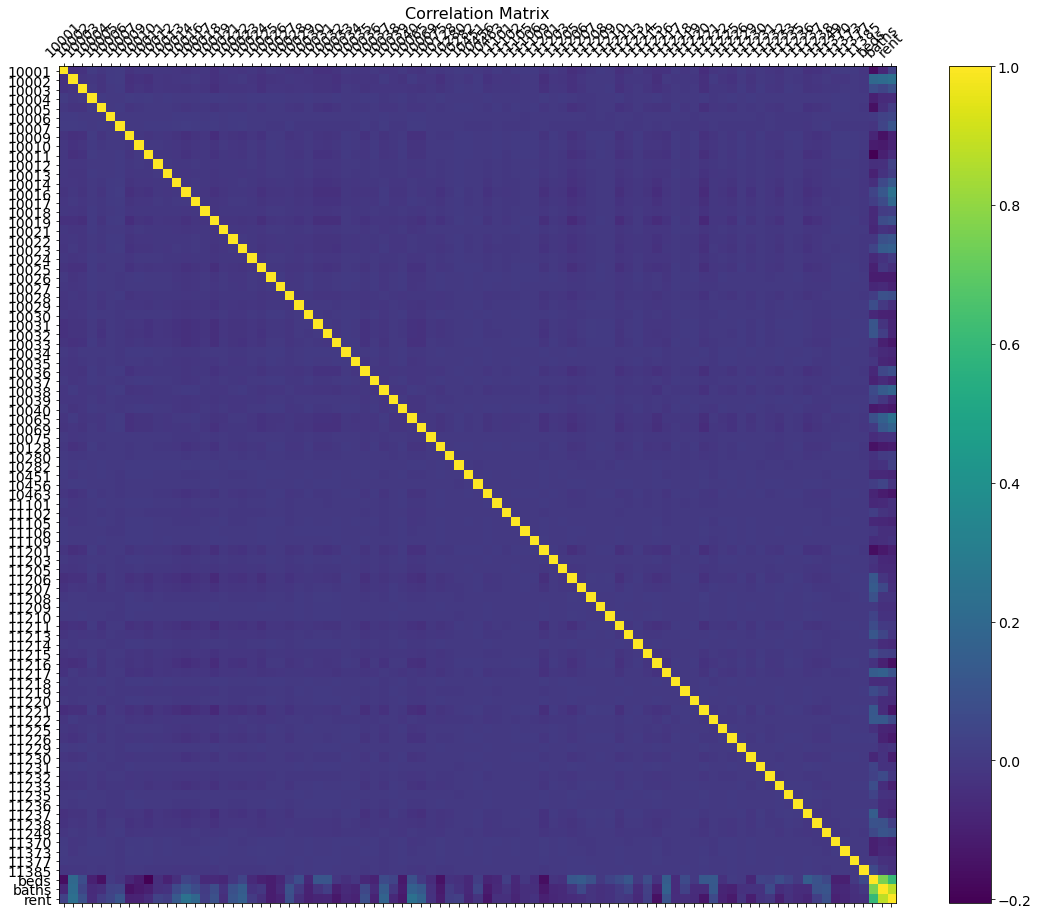

In [ ]:
f = plt.figure(figsize=(19, 15))
plt.matshow(houseCorr.corr(), fignum=f.number)
plt.xticks(range(houseCorr.shape[1]), houseCorr.columns, fontsize=14, rotation=45)
plt.yticks(range(houseCorr.shape[1]), houseCorr.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [ ]:
# Skewness of numeric attributes
#The preceding matrix is the skewness index. Any value closer to 0 indicates a low
#degree of skewness. Positive values indicate right skew and negative values, left skew.
#Variables that show higher values of right skew and left skew are candidates for further
#feature engineering by normalization. Let's now visualize the skewness by plotting
#histograms and density plots.
df_new.skew()

10001     5.981425
10002     5.981425
10003     5.768775
10004    33.481338
10005     7.710587
           ...    
11377    33.481338
11385    16.673252
beds      0.369382
baths     2.213090
rent      3.739033
Length: 89, dtype: float64

In [ ]:
df_new.skew().sort_values()

beds      0.369382
baths     2.213090
rent      3.739033
10019     4.094520
11221     4.577213
           ...    
10282    33.481338
11209    33.481338
11109    33.481338
11106    33.481338
11235    33.481338
Length: 89, dtype: float64

(array([1.12e+03, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 1.00e+00]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

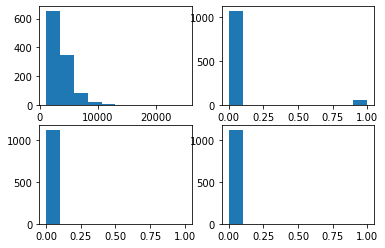

In [ ]:
fig, axs = plt.subplots(2,2)
axs[0,0].hist(df_new['rent'])
axs[0,1].hist(df_new[10019])
axs[1,0].hist(df_new[10282])
axs[1,1].hist(df_new[11235])

In [ ]:
df_new[10019].value_counts() # Low skew because it is repeated many times in data

0    1064
1      57
Name: 10019, dtype: int64

In [ ]:
df_new[11235].value_counts() #high skew because it is not repeated many times in data

0    1120
1       1
Name: 11235, dtype: int64

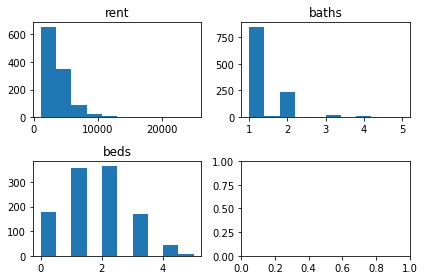

In [ ]:
fig, axs = plt.subplots(2,2)
axs[0,0].hist(df_new['rent'])
axs[0,0].set_title('rent')
axs[0,1].hist(df_new['baths'])
axs[0,1].set_title('baths')
axs[1,0].hist(df_new['beds'])
axs[1,0].set_title('beds')
plt.tight_layout()

Text(0, 0.5, 'Normalised rent distribution')

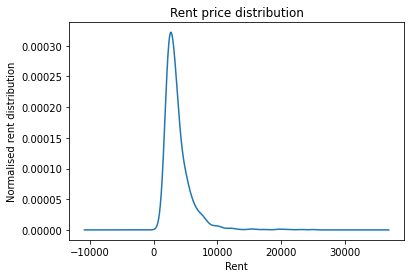

In [ ]:
df_new['rent'].plot(kind = 'density',subplots = False,layout = (1,1))
plt.title('Rent price distribution')
plt.xlabel('Rent')
plt.ylabel('Normalised rent distribution')

### Follow Data science workshop and ML Oreilly book / Start build model from here:

In [ ]:
%matplotlib inline
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.graphics.api as smg
import pandas as pd
import numpy as np
import patsy
from statsmodels.graphics.correlation import plot_corr
from sklearn.model_selection import train_test_split
plt.style.use('seaborn')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df_locat=pd.read_csv('/content/drive/My Drive/Data/NYC_zip_and_locate.csv')
df_locat.head()

,Unnamed: 0,url,address,neighborhood,rent,beds,baths,zip,Latitude,Longitude
0,0,https://www.renthop.com/listings/345-east-83rd...,"345 East 83rd St, Apt 29","Yorkville, Upper East Side, Upper Manhattan, M...",2150,1,1.0,10028.0,40.775331,-73.951205
1,1,https://www.renthop.com/listings/63-wall-stree...,"63 Wall Street, Apt 810","Financial District, Downtown Manhattan, Manhattan",3662,1,1.0,10005.0,40.705765,-74.008547
2,2,https://www.renthop.com/listings/blue-slip/-2r...,Blue Slip,"Greenpoint, Northern Brooklyn, Brooklyn",4121,1,1.0,NaN,NaN,NaN
3,3,https://www.renthop.com/listings/blue-slip/-2r...,Blue Slip,"Greenpoint, Northern Brooklyn, Brooklyn",3245,0,1.0,NaN,NaN,NaN
4,4,https://www.renthop.com/listings/424-east-9th-...,"424 East 9th Street, Apt 10","East Village, Downtown Manhattan, Manhattan",4150,2,1.0,10009.0,40.727564,-73.983818


In [ ]:
df_locat.isnull().sum()

Unnamed: 0        0
url               0
address           3
neighborhood      0
rent              0
beds              0
baths             0
zip             879
Latitude        879
Longitude       879
dtype: int64

In [ ]:
df_locat=df_locat.dropna()

In [ ]:
df_new=df_locat[['zip','beds','baths','rent']]
print(df_new.shape)
df_new.head()

(1121, 4)


,zip,beds,baths,rent
0,10028.0,1,1.0,2150
1,10005.0,1,1.0,3662
4,10009.0,2,1.0,4150
7,10002.0,3,2.0,4600
8,10463.0,1,1.0,1925


In [ ]:
df_new['zip']=df_new['zip'].astype('int')
df_new['zip']=df_new['zip'].astype('category')
df_new.dtypes

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


zip      category
beds        int64
baths     float64
rent        int64
dtype: object

In [ ]:
X=df_new.drop('rent',axis=1)
y=df_new['rent']
print(X.shape)
print(y.shape)

(1121, 3)
(1121,)


In [ ]:
seed = 10
test_data_size = 0.3

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_data_size, 
                                                    random_state = seed)
train_data = pd.concat([X_train, y_train], axis = 1)
test_data = pd.concat([X_test, y_test], axis = 1)

In [ ]:
X_train[:3]

,zip,beds,baths
143,10011,0,1.0
280,10039,1,1.0
1514,10016,2,1.0


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [ ]:
# Pipeline for transforming categorical variables
catTransformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])
# Pipeline for scaling numerical variables
numTransformer = Pipeline(steps=[('scaler', StandardScaler())])

In [ ]:
# Selecting numerical features
numFeatures = X.select_dtypes(include=['int64', 'float64']).columns
print(numFeatures)
# Selecting Categorical features
catFeatures = X.select_dtypes(include=['category']).columns
print(catFeatures)

Index(['beds', 'baths'], dtype='object')
Index(['zip'], dtype='object')


In [ ]:
# Creating the preprocessing engine
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
  transformers=[
    ('numeric', numTransformer, numFeatures),
    ('categoric', catTransformer, catFeatures)])

In [ ]:
# Transforming the Training data
Xtran_train = pd.DataFrame(preprocessor.fit_transform(X_train))
print(Xtran_train.shape)
Xtran_train.head()

(784, 1)


,0
0,"(0, 0)\t-1.5093856177102611\n (0, 1)\t-0.55..."
1,"(0, 0)\t-0.5827150427025519\n (0, 1)\t-0.55..."
2,"(0, 0)\t0.3439555323051574\n (0, 1)\t-0.550..."
3,"(0, 0)\t0.3439555323051574\n (0, 1)\t-0.550..."
4,"(0, 0)\t0.3439555323051574\n (0, 1)\t-0.550..."


In [ ]:
print(train_data.shape) # combine X_train an y_train
print(test_data.shape)

(784, 89)
(337, 89)


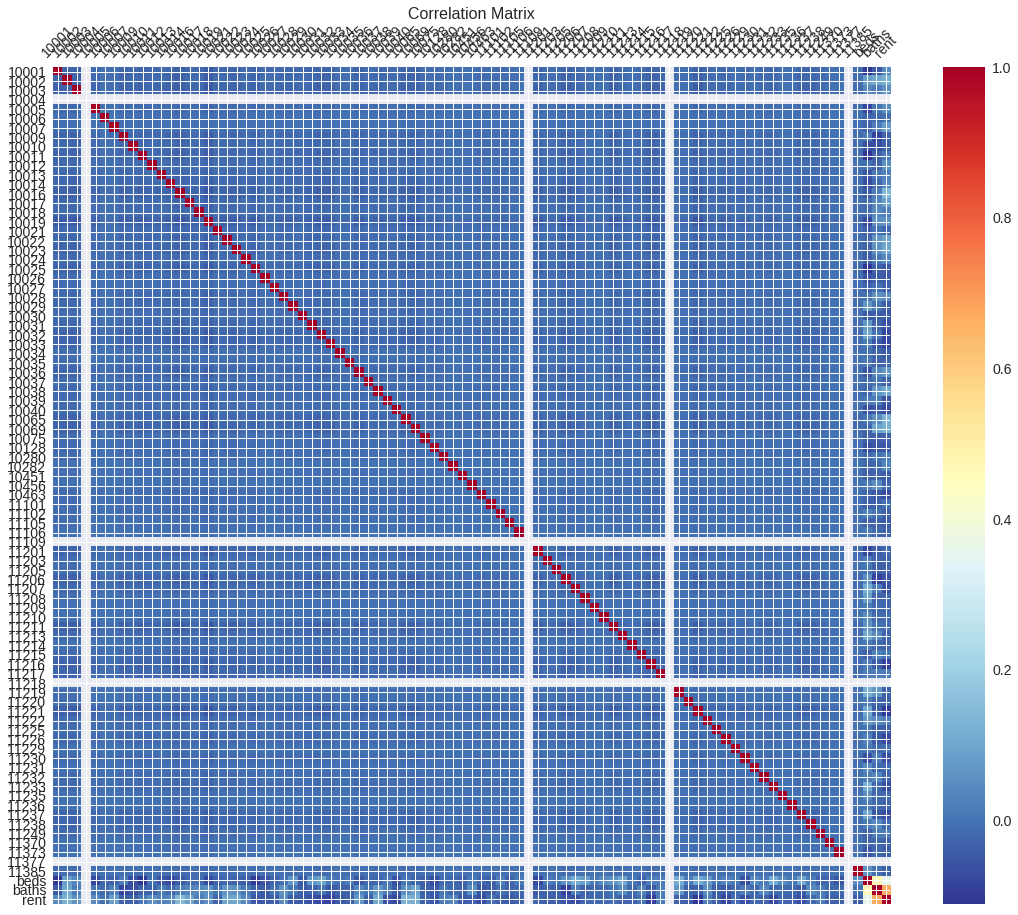

In [ ]:
f = plt.figure(figsize=(19, 15))
plt.matshow(train_data.corr(), fignum=f.number,cmap='RdYlBu_r')
plt.xticks(range(train_data.shape[1]), train_data.columns, fontsize=14, rotation=45)
plt.yticks(range(train_data.shape[1]), train_data.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [ ]:
corrMatrix.sort_values(by='rent',ascending=False)[:10]

,10001,10002,10003,10004,10005,10006,10007,10009,10010,10011,10012,10013,10014,10016,10017,10018,10019,10021,10022,10023,10024,10025,10026,10027,10028,10029,10030,10031,10032,10033,10034,10035,10036,10037,10038,10039,10040,10065,10069,10075,...,11106,11109,11201,11203,11205,11206,11207,11208,11209,11210,11211,11213,11214,11215,11216,11217,11218,11219,11220,11221,11222,11225,11226,11229,11230,11231,11232,11233,11235,11236,11237,11238,11249,11370,11373,11377,11385,beds,baths,rent
rent,0.047036,0.121425,0.060276,NaN,0.048591,-0.005052,0.088517,-0.029122,-0.034561,0.008550,0.058072,0.023983,0.037104,0.144934,0.090016,0.022501,0.060104,-0.020374,0.094815,0.105480,0.036588,-0.050224,-0.045003,-0.034595,0.042613,-0.037916,-0.043295,-0.065836,-0.084264,-0.080774,-0.043676,-0.032398,0.072934,-0.036276,0.102118,-0.056338,-0.068071,0.129587,0.122789,-0.032875,...,-0.025670,NaN,-0.022876,-0.034093,-0.030399,-0.057787,-0.063812,-0.021738,-0.020912,-0.018136,-0.010911,-0.032333,-0.027272,0.003395,-0.091913,0.015864,NaN,-0.029615,-0.034082,-0.102297,0.019181,-0.034323,-0.077033,-0.010762,-0.067131,-0.017740,-0.024334,-0.069444,-0.022498,-0.025670,-0.066525,-0.017746,0.018811,-0.032807,-0.036788,NaN,-0.036343,0.361694,0.667022,1.000000
baths,-0.045230,0.097686,0.022669,NaN,0.003719,-0.019664,0.021308,-0.081916,-0.062542,-0.030865,-0.025877,0.010506,-0.018047,0.019446,0.032343,0.042781,0.055911,0.000470,0.064417,0.054220,0.008561,-0.029879,-0.039403,-0.004615,0.060799,0.003719,-0.039403,-0.028223,0.000822,-0.047882,-0.027826,-0.027826,0.037203,0.006042,0.069979,0.018189,-0.044082,0.052452,0.094105,-0.034102,...,-0.019664,NaN,-0.039373,-0.027826,-0.034102,-0.085754,0.018654,-0.027826,-0.019664,-0.019664,0.000954,0.042781,-0.019664,0.026818,-0.040227,0.019384,NaN,0.070443,-0.027826,-0.035332,0.049324,-0.034102,-0.044564,-0.019664,0.018119,-0.019664,0.037002,-0.018368,-0.019664,-0.019664,-0.044360,0.043287,0.018189,-0.019664,-0.019664,NaN,-0.004615,0.472902,1.000000,0.667022
beds,-0.103993,0.084293,0.037299,NaN,-0.076768,-0.020825,-0.029469,0.018746,-0.066235,-0.111099,-0.005048,-0.051700,-0.069648,-0.042297,-0.014884,-0.012121,-0.074859,-0.030179,-0.020130,-0.029946,-0.037610,-0.103993,-0.058319,-0.025139,0.000833,0.070695,-0.041729,0.071766,0.093666,0.018746,-0.006037,0.017395,-0.054292,-0.016971,-0.024102,0.012708,-0.061533,0.003175,-0.020285,-0.036115,...,0.012292,NaN,-0.078637,0.017395,0.002173,0.055697,0.111376,0.087690,0.012292,0.045408,0.066194,0.105490,0.012292,-0.030179,0.019954,0.019603,NaN,0.111122,0.017395,0.106180,0.072101,0.002173,0.030981,0.012292,-0.059166,0.045408,0.016643,0.112827,0.045408,0.012292,0.099803,0.016207,-0.031836,-0.020825,-0.053941,NaN,0.057811,1.000000,0.472902,0.361694
10016,-0.033092,-0.030577,-0.036943,NaN,-0.022673,-0.007128,-0.010088,-0.029696,-0.022673,-0.029696,-0.018933,-0.021495,-0.026896,1.000000,-0.024869,-0.020253,-0.050940,-0.018933,-0.025901,-0.029696,-0.017517,-0.033092,-0.014284,-0.014284,-0.023795,-0.022673,-0.014284,-0.024869,-0.033092,-0.029696,-0.010088,-0.010088,-0.029696,-0.012363,-0.022673,-0.015981,-0.015981,-0.032273,-0.033893,-0.012363,...,-0.007128,NaN,-0.029696,-0.010088,-0.012363,-0.036201,-0.023795,-0.010088,-0.007128,-0.007128,-0.038388,-0.020253,-0.007128,-0.018933,-0.035447,-0.026896,NaN,-0.010088,-0.010088,-0.040472,-0.015981,-0.012363,-0.023795,-0.007128,-0.020253,-0.007128,-0.017517,-0.022673,-0.007128,-0.007128,-0.028791,-0.028791,-0.015981,-0.007128,-0.007128,NaN,-0.014284,-0.042297,0.019446,0.144934
10065,-0.026842,-0.024802,-0.029965,NaN,-0.018391,-0.005782,-0.008182,-0.024088,-0.018391,-0.024088,-0.015357,-0.017436,-0.021817,-0.032273,-0.020172,-0.016428,-0.041319,-0.015357,-0.021009,-0.024088,-0.014209,-0.026842,-0.011586,-0.011586,-0.019301,-0.018391,-0.011586,-0.020172,-0.026842,-0.024088,-0.008182,-0.008182,-0.024088,-0.010028,-0.018391,-0.012962,-0.012962,1.000000,-0.027492,-0.010028,...,-0.005782,NaN,-0.024088,-0.008182,-0.010028,-0.029364,-0.019301,-0.008182,-0.0057

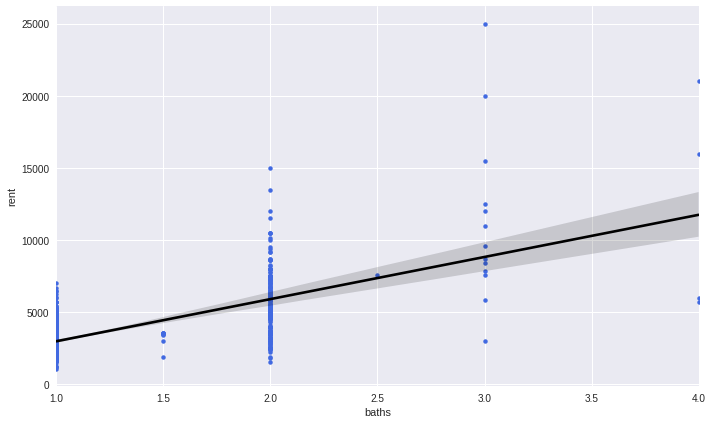

In [ ]:
#Baths and rent correlation:
fig, ax = plt.subplots(figsize=(10, 6))
sns.regplot(x='baths', y='rent', data=train_data,
ax=ax, color='k', scatter_kws={"s": 20,"color":"royalblue", "alpha":1})
#ax.set_ylabel('Crime rate per Capita', fontsize=15, fontname='DejaVu Sans')
#ax.set_xlabel("Median value of owner-occupied homes in $1000's",\ fontsize=15,
#fontname='DejaVu Sans')
#ax.set_xlim(left=None, right=None)
#ax.set_ylim(bottom=None, top=30)
#ax.tick_params(axis='both', which='major', labelsize=12)
fig.tight_layout()

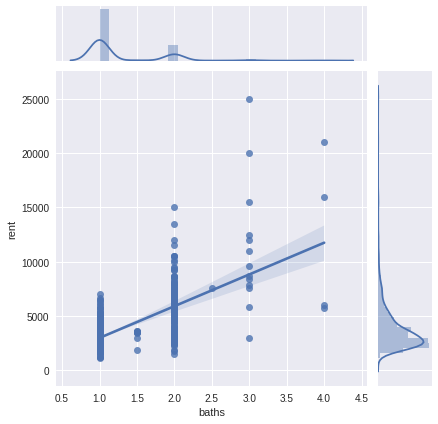

In [ ]:
sns.jointplot(x="baths", y="rent", data=train_data, kind="reg");

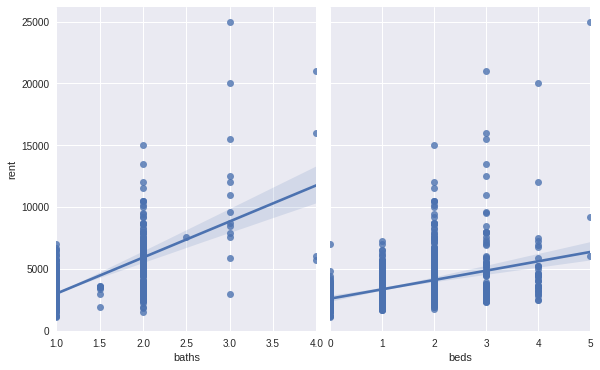

In [ ]:
sns.pairplot(train_data, x_vars=["baths", "beds"], y_vars=["rent"],
             height=5, aspect=.8, kind="reg");

In [ ]:
sns.lmplot(x="baths", y="rent", col="beds", data=train_data,
           col_wrap=2, height=3);

NameError: ignored